### Aqui buscamos responder as perguntas de negócio baseado nos dados

- Quais áreas do país mais fizeram pedidos?

- Qual categoria de produtos gerou a maior receita?
                         
- Quais categorias vendem mais?

- O número de vendas aumentou com o tempo?

- Como o Valor médio do pedido (AOV) mudou com o tempo?

- O quão preciso são as datas estimadas de entrega?

In [159]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
df = pd.read_parquet('../Dados/processado/df_limpo.parquet')
df.head()

,order_id,product_id,valor_final,categoria,customer_id,customer_state,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,3ce436f183e68e07877b285a838db11a,RJ,2017-09-13 08:59:02,2017-09-29,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,SP,2017-04-26 10:53:06,2017-05-15,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,216.87,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,MG,2018-01-14 14:33:31,2018-02-05,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,25.78,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,SP,2018-08-08 10:00:35,2018-08-20,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,218.04,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,SP,2017-02-04 13:57:51,2017-03-17,2017-03-01 16:42:31


#### Quais áreas do país mais fizeram pedidos?

In [ ]:
#Separamos a quantidade de pedidos em top3 / outros
estados = df['customer_state'].value_counts()

valores = estados.head(3)
valores['Outros'] = estados.iloc[3:].sum()
valores

customer_state
SP        42165
RJ        12826
MG        11790
Outros    35644
Name: count, dtype: int64

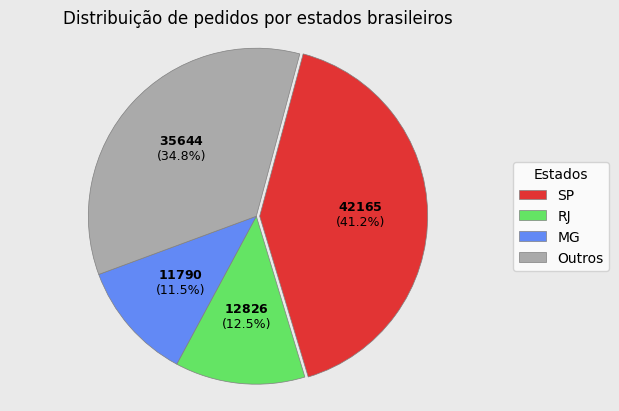

In [4]:
import matplotlib.pyplot as plt

total = valores.sum()
def func_pct(pct):
    quantidade = int(round(pct*total/100))
    return rf'$\mathbf{{{quantidade}}}$' + f'\n({pct:.1f}%)'



fig, ax = plt.subplots()
fig.patch.set_facecolor("#eaeaea")
ax.set_facecolor('#eaeaea')
ax.pie(valores,
       autopct=func_pct,
       startangle=75,
       explode=[0.02,0,0,0],
       colors=["#e23434","#64e464","#6289f5","#aaaaaa"],
       wedgeprops={'edgecolor': 'gray', 'linewidth': 0.5},
        textprops={'fontsize': 9},
       counterclock=False)

ax.axis('equal')
ax.legend(
    valores.index,
    title="Estados",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)
plt.title('Distribuição de pedidos por estados brasileiros')
plt.show()

Os estados que mais vendem são:
- São Paulo (quase metade dos pedidos)
- Rio de Janeiro
- Minas gerais

### Qual categoria de produtos gerou a maior receita? E quais categorias vendem mais?

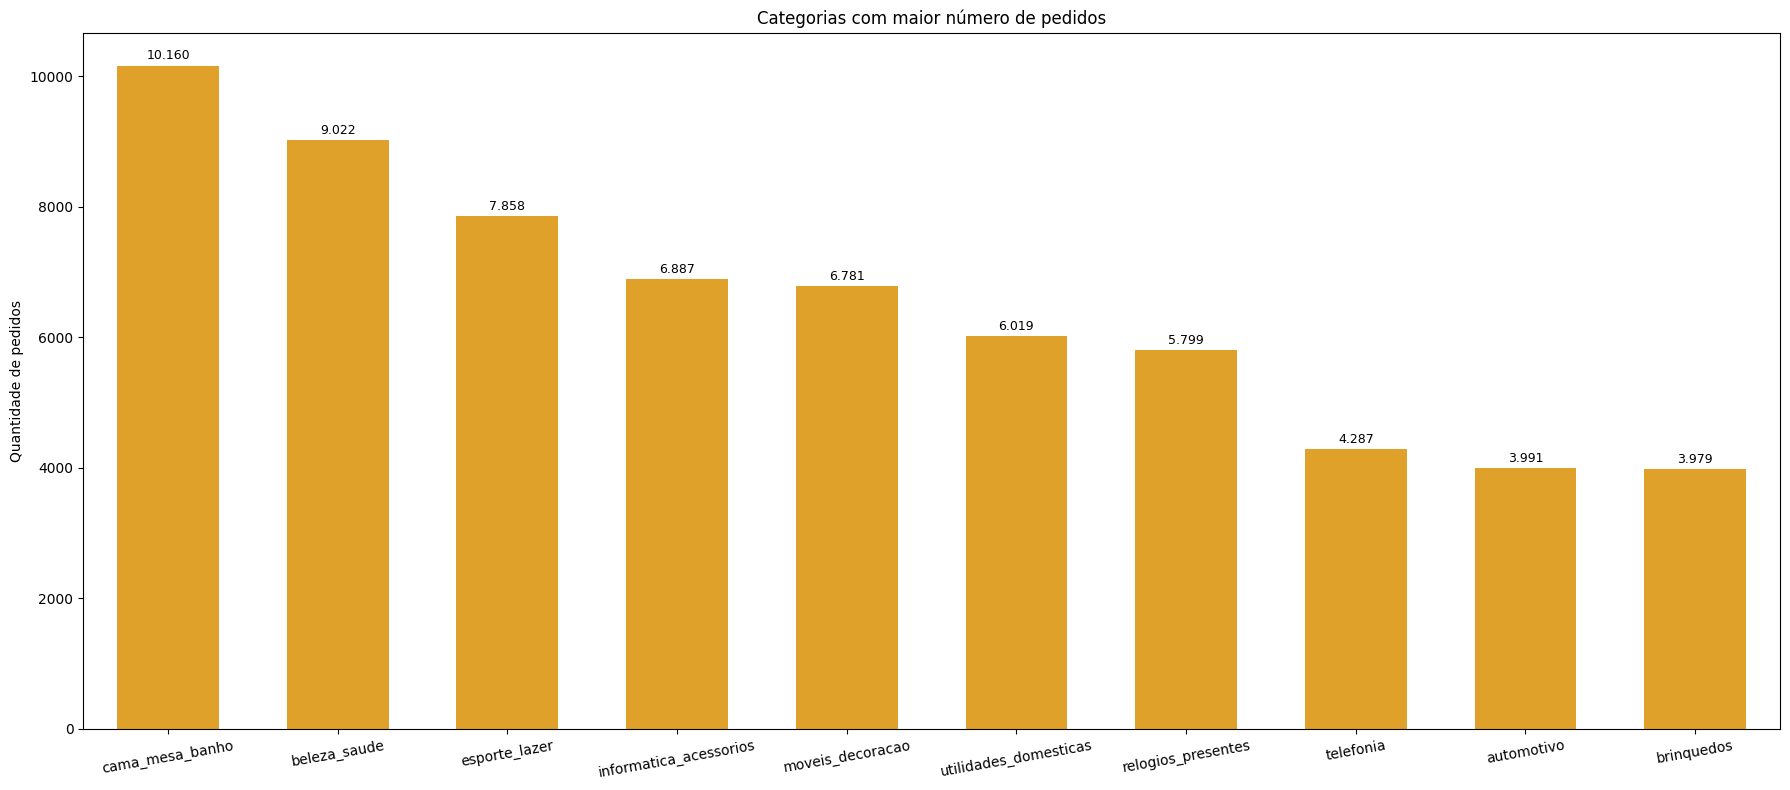

In [5]:
categorias = df['categoria'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(18, 8))

ax.bar(categorias.index,
       categorias.values,
       color="#e0a12b",
       width=0.6)

for i, v in enumerate(categorias):
    ax.text(i, v + 100, f'{v:,}'.replace(',','.'), ha='center', fontsize=9)
ax.set_title('Categorias com maior número de pedidos')
ax.set_ylabel('Quantidade de pedidos')    
plt.xticks(rotation=10)
ax.set_xlim(-0.5, len(categorias) - 0.5)
plt.tight_layout()
plt.show()

In [6]:
valor_categoria = df.groupby('categoria')['valor_final'].sum().sort_values(ascending=False).head(10)
valor_categoria

categoria
beleza_saude              1441248.07
relogios_presentes        1305541.61
cama_mesa_banho           1241681.72
esporte_lazer             1156656.48
informatica_acessorios    1059272.40
moveis_decoracao           902511.79
utilidades_domesticas      778397.77
cool_stuff                 719329.95
automotivo                 685384.32
ferramentas_jardim         584219.21
Name: valor_final, dtype: float64

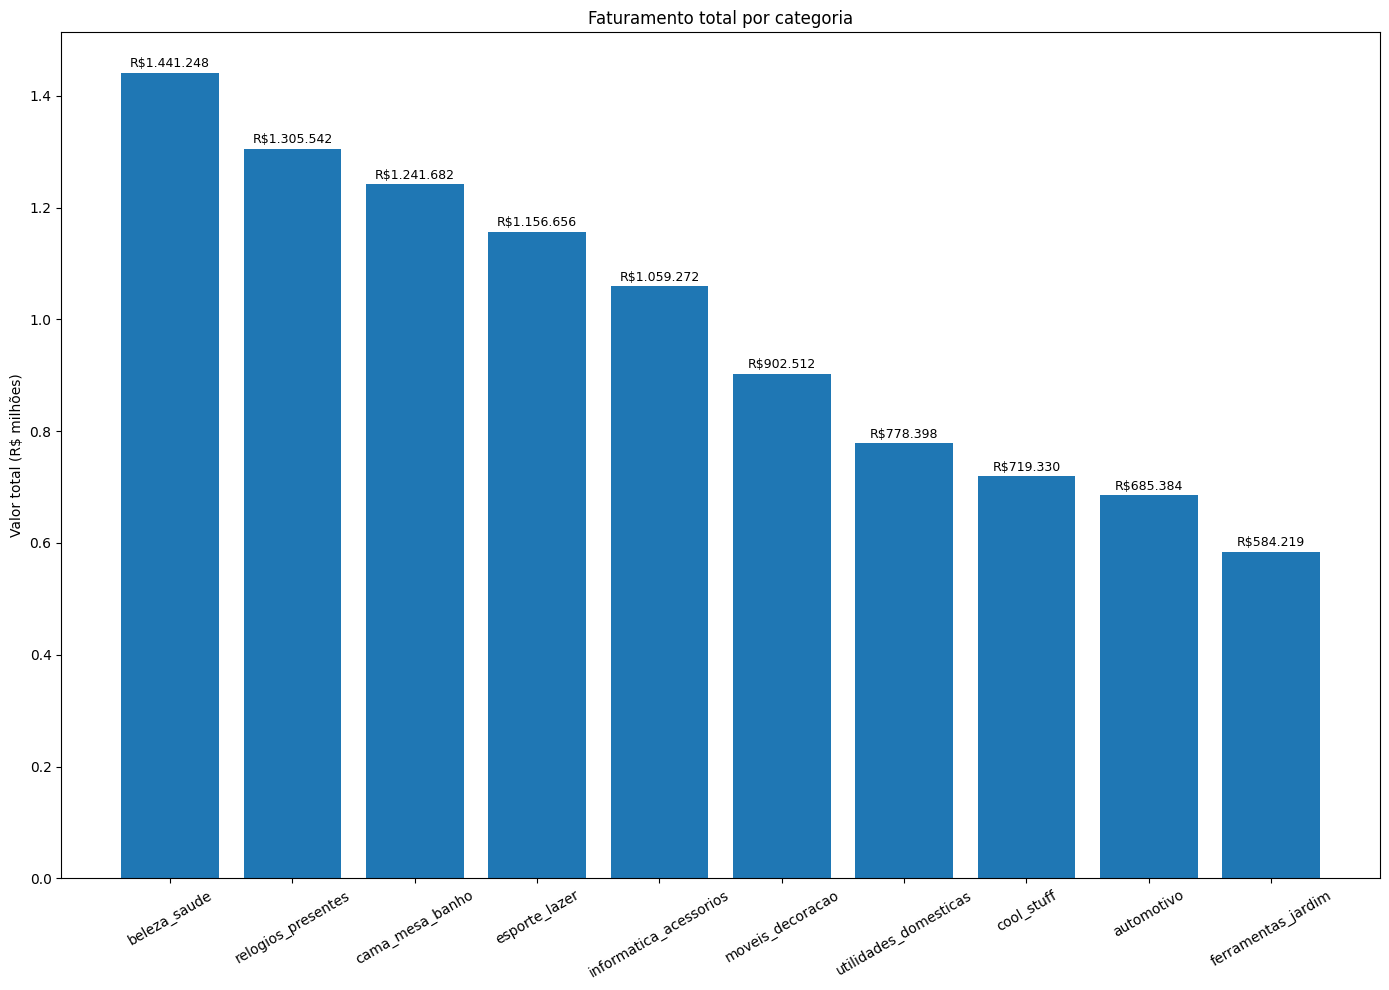

In [7]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.bar(valor_categoria.index, valor_categoria.values)

ax.set_title('Faturamento total por categoria')
ax.set_ylabel('Valor total (R$ milhões)')
plt.xticks(rotation=30)
ax.yaxis.set_major_formatter(lambda x, _: f'{x/1_000_000:.1f}')

for i, v in enumerate(valor_categoria):
    ax.text(i, v + 10000, f'R${v:,.0f}'.replace(",", "."), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

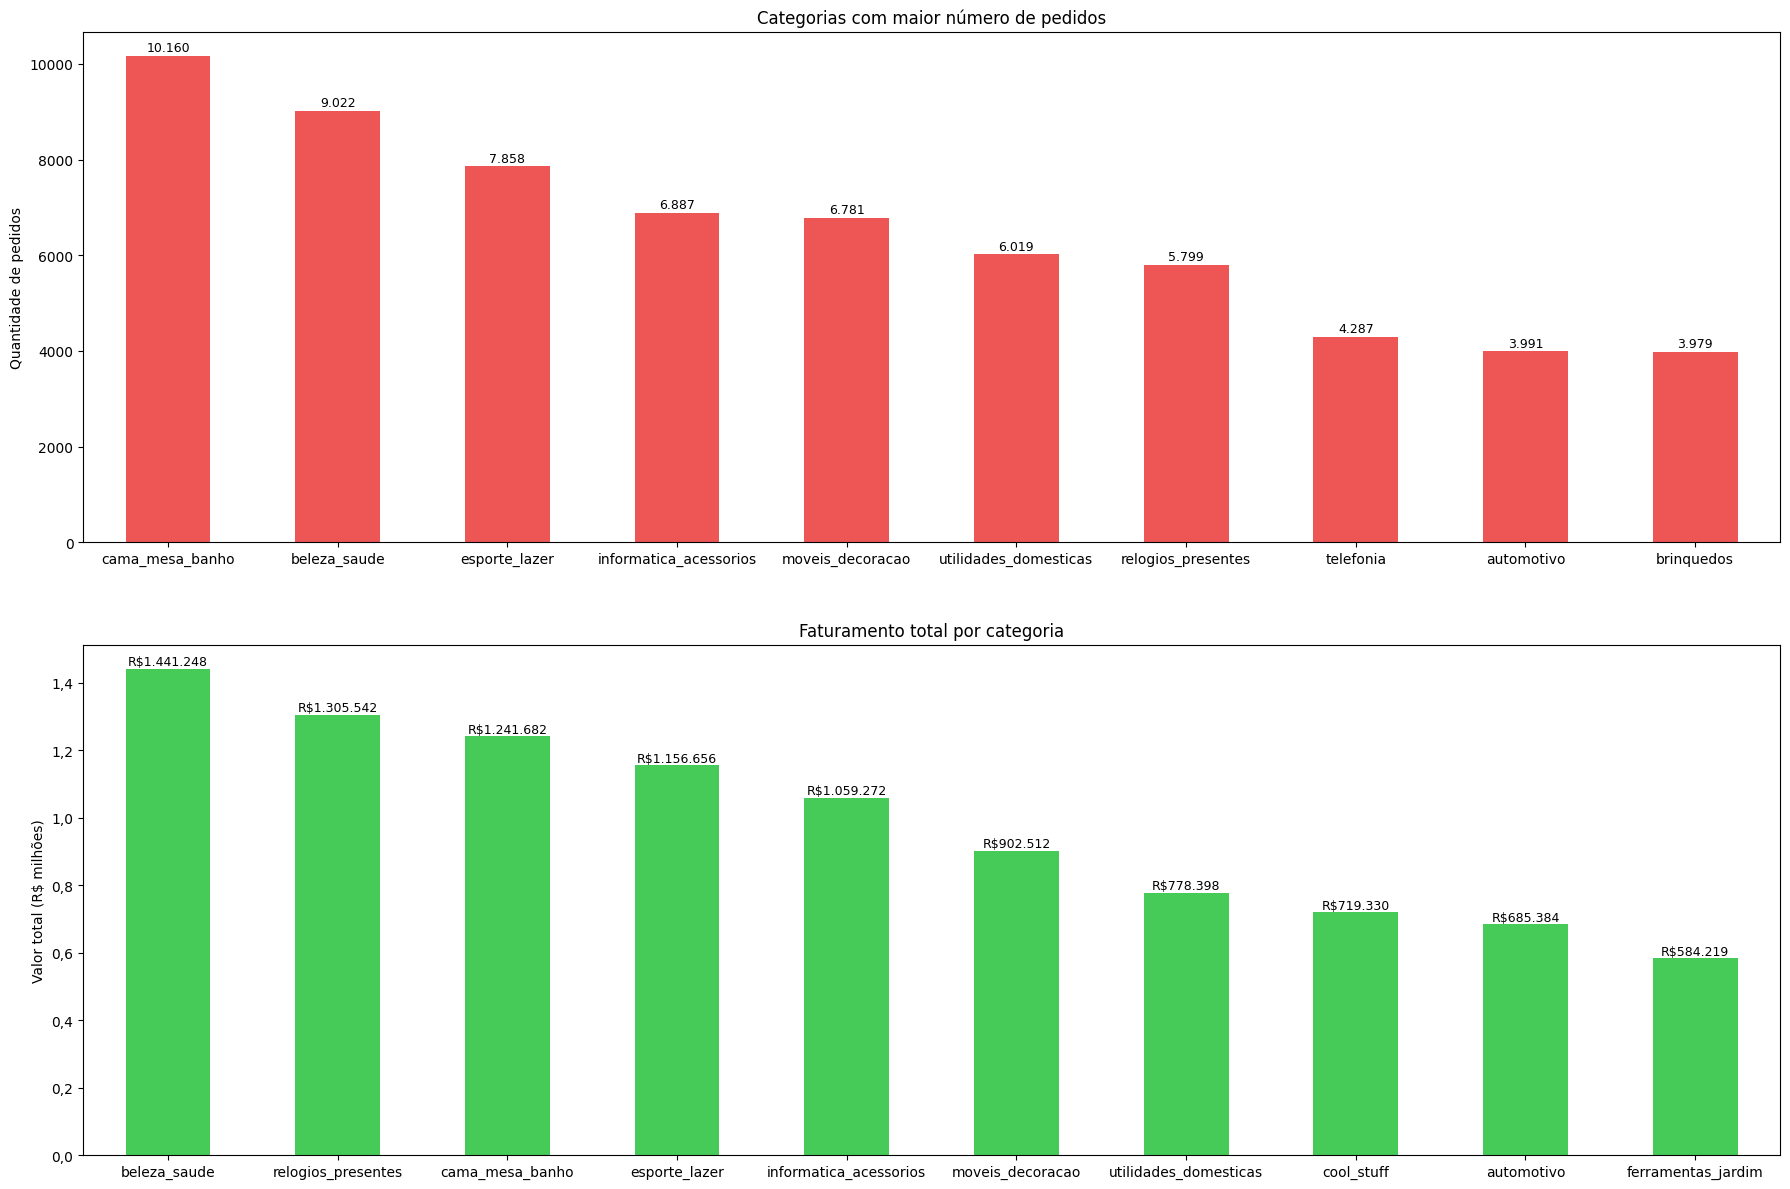

In [30]:
# Gráficos lado a lado para comparação
fig, ax = plt.subplots(2, 1, figsize=(18,12))

#Vendas

ax[0].bar(categorias.index,
       categorias.values,
       color="#ee5656",
       width=0.5)

for i, v in enumerate(categorias):
    ax[0].text(i, v + 100, f'{v:,}'.replace(',','.'), ha='center', fontsize=9)
ax[0].set_title('Categorias com maior número de pedidos')
ax[0].set_ylabel('Quantidade de pedidos')    
ax[0].set_xlim(-0.5, len(categorias) - 0.5)

#Renda
ax[1].bar(valor_categoria.index, 
          valor_categoria.values, 
          color = "#46ca58",
          width = 0.5)

ax[1].set_title('Faturamento total por categoria')
ax[1].set_ylabel('Valor total (R$ milhões)')
ax[1].yaxis.set_major_formatter(lambda x, _: f'{x/1_000_000:.1f}'.replace('.',','))
ax[1].set_xlim(-0.5, len(valor_categoria) - 0.5)

for i, v in enumerate(valor_categoria):
    ax[1].text(i, v + 10000, f'R${v:,.0f}'.replace(",", "."), ha='center', fontsize=9)


plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.show()

### O número de vendas aumentou com o tempo?

In [130]:
vendas_mes = df.groupby(df['order_purchase_timestamp'].dt.to_period('M')).size()
vendas_dia = df.groupby(df['order_purchase_timestamp'].dt.date).size()
vendas_dia.sort_values()

order_purchase_timestamp
2016-09-15       1
2016-12-23       1
2017-01-08       4
2017-01-07       4
2017-01-06       4
              ... 
2018-08-06     387
2017-11-26     401
2017-11-27     417
2017-11-25     508
2017-11-24    1212
Length: 612, dtype: int64

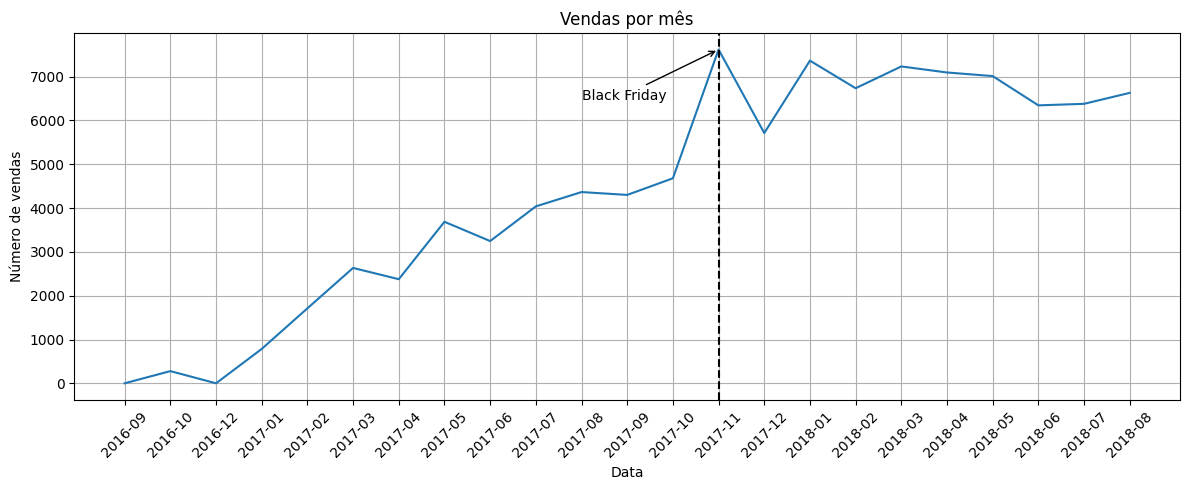

In [100]:
plt.figure(figsize=(12, 5))
plt.plot(vendas_mes.index.astype(str), 
         vendas_mes.values,)
plt.xlabel('Data')
plt.ylabel('Número de vendas')
plt.title('Vendas por mês')

data_black_friday = '2017-11'
plt.axvline(
    data_black_friday,
    linestyle='--',
    label='Mês da Black Friday',
    color='black'
)

plt.annotate(
    'Black Friday',
    xy=(data_black_friday, vendas_mes.loc[data_black_friday]),
    xytext=('2017-08', vendas_mes.max() * 0.85),
    arrowprops=dict(arrowstyle='->'),
)


plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

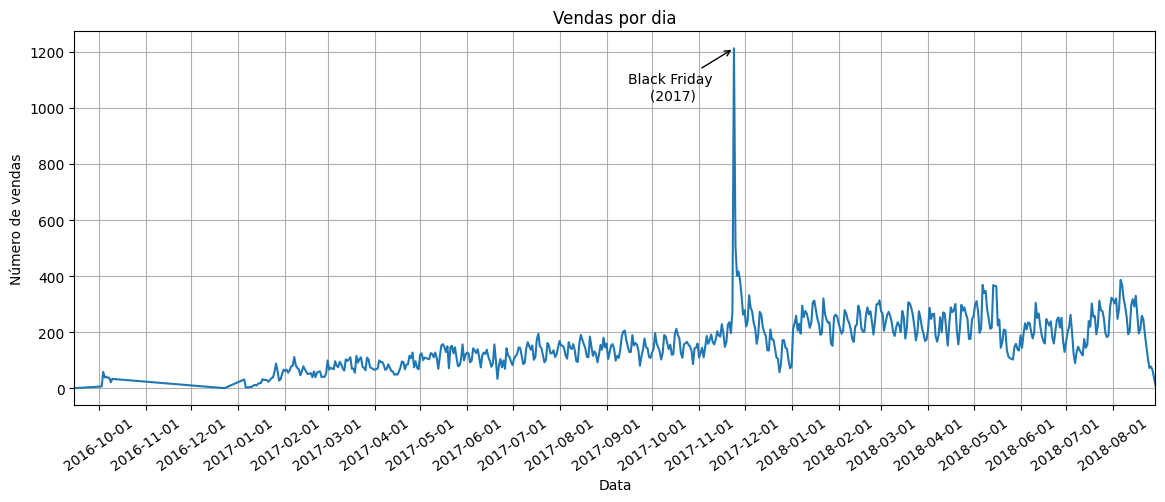

In [165]:
plt.figure(figsize=(12, 5))
plt.plot(vendas_dia.index, 
         vendas_dia.values,)
plt.xlabel('Data')
plt.ylabel('Número de vendas')
plt.title('Vendas por dia')

data_black_friday = pd.to_datetime('2017-11-24')
valor_bf = vendas_dia.loc[data_black_friday.date()]

plt.annotate(
    'Black Friday\n     (2017)',
    xy=(data_black_friday, valor_bf),
    xytext=(data_black_friday - pd.Timedelta(days=70), vendas_dia.max() * 0.85),
    arrowprops=dict(arrowstyle='->')
)

plt.xticks(rotation=35)
plt.tight_layout()
plt.grid()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlim(vendas_dia.index.min(),vendas_dia.index.max())
plt.show()

### Como o Valor médio do pedido (AOV) mudou com o tempo?

### O quão preciso são as datas estimadas de entrega?